Usage example of MediaPipe Hands Solution API in Python (see also http://solutions.mediapipe.dev/hands).

In [1]:
! pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 41.0 MB/s eta 0:00:00


Upload any image that contains hand(s) to the Colab. We took two examples from the web: https://unsplash.com/photos/QyCH5jwrD_A and https://unsplash.com/photos/mt2fyrdXxzk


In [3]:
from google.colab import files

uploaded = files.upload()

Saving brooke-cagle-mt2fyrdXxzk-unsplash.jpg to brooke-cagle-mt2fyrdXxzk-unsplash.jpg


brooke-cagle-mt2fyrdXxzk-unsplash.jpg


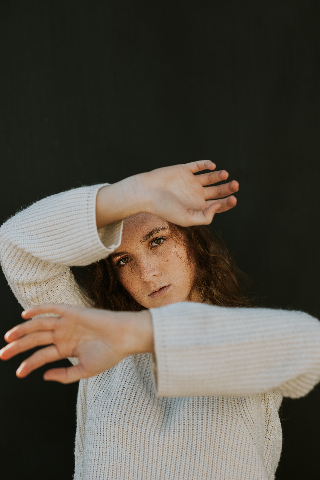

In [4]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}
# Preview the images.
for name, image in images.items():
  print(name)   
  resize_and_show(image)

All MediaPipe Solutions Python API examples are under mp.solutions.

For the MediaPipe Hands solution, we can access this module as `mp_hands = mp.solutions.hands`.

You may change the parameters, such as `static_image_mode`, `max_num_hands`, and `min_detection_confidence`, during the initialization. Run `help(mp_hands.Hands)` to get more informations about the parameters.

In [6]:
import mediapipe as mp
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
# help(mp_hands.Hands)

Handedness of brooke-cagle-mt2fyrdXxzk-unsplash.jpg:
[classification {
  index: 0
  score: 0.9822625517845154
  label: "Left"
}
, classification {
  index: 1
  score: 0.9344392418861389
  label: "Right"
}
]
Hand landmarks of brooke-cagle-mt2fyrdXxzk-unsplash.jpg:
Index finger tip coordinate: ( 417.12775802612305, 521.6625137329102)
Index finger tip coordinate: ( 121.85909080505371, 280.0408687591553)


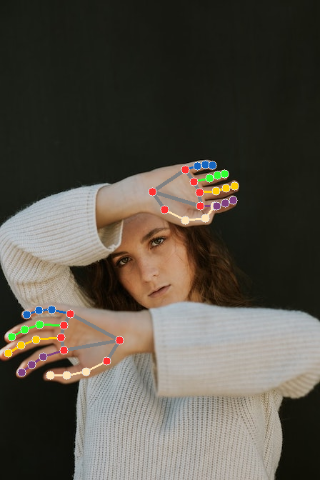

Handedness of kira-auf-der-heide-QyCH5jwrD_A-unsplash.jpg:
[classification {
  index: 0
  score: 0.8767261505126953
  label: "Left"
}
]
Hand landmarks of kira-auf-der-heide-QyCH5jwrD_A-unsplash.jpg:
Index finger tip coordinate: ( 226.7688331604004, 211.63099694252014)


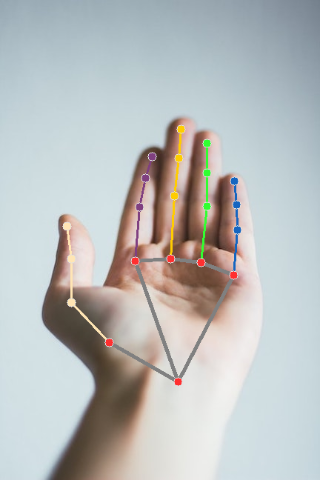

In [ ]:
# Run MediaPipe Hands.
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.7) as hands:
  for name, image in images.items():
    # Convert the BGR image to RGB, flip the image around y-axis for correct 
    # handedness output and process it with MediaPipe Hands.
    results = hands.process(cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 1))

    # Print handedness (left v.s. right hand).
    print(f'Handedness of {name}:')
    print(results.multi_handedness)

    if not results.multi_hand_landmarks:
      continue
    # Draw hand landmarks of each hand.
    print(f'Hand landmarks of {name}:')
    image_hight, image_width, _ = image.shape
    annotated_image = cv2.flip(image.copy(), 1)
    for hand_landmarks in results.multi_hand_landmarks:
      # Print index finger tip coordinates.
      print(
          f'Index finger tip coordinate: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_hight})'
      )
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
    resize_and_show(cv2.flip(annotated_image, 1))

Hand world landmarks of brooke-cagle-mt2fyrdXxzk-unsplash.jpg:


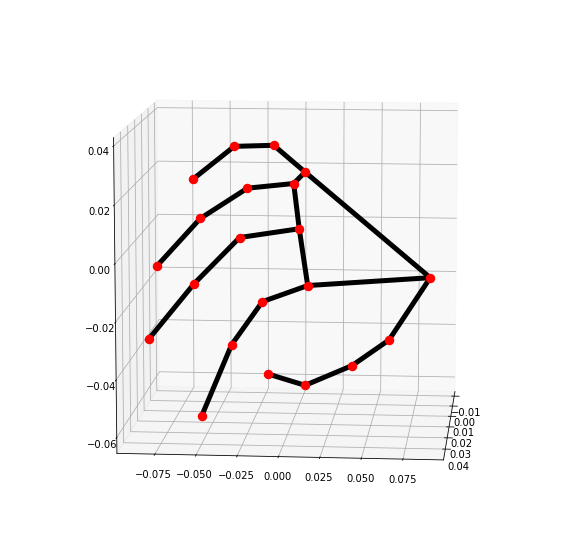

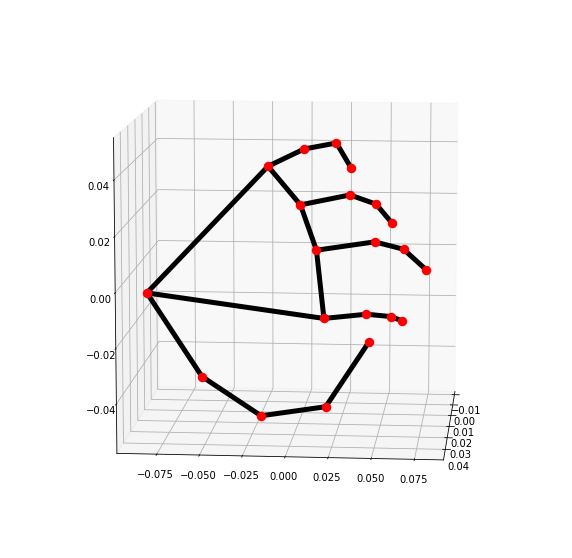

In [7]:
# Run MediaPipe Hands and plot 3d hands world landmarks.
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.7) as hands:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Hands.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # Draw hand world landmarks.
    print(f'Hand world landmarks of {name}:')
    if not results.multi_hand_world_landmarks:
      continue
    for hand_world_landmarks in results.multi_hand_world_landmarks:
      mp_drawing.plot_landmarks(
        hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)